In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import mahotas as mh
import numpy as np

In [4]:
DATA_DIR = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/classified_images/good_images/'
good ='/raid/mpsych/RISTERLAB/fly_segmentation_experiments/classified_images/good_9/'
bad ='/raid/mpsych/RISTERLAB/fly_segmentation_experiments/classified_images/bad_images_2/'

In [5]:
img_file_names = os.listdir(DATA_DIR)

In [6]:
img_file_names_sorted = sorted(img_file_names)

In [7]:
len(os.listdir(DATA_DIR))

254

In [8]:
img_file_names_sorted

['.ipynb_checkpoints',
 '000000_000000_000008_000000-Copy1.tif',
 '000000_000000_000008_000000.tif',
 '000000_000000_000031_000000-Copy1.tif',
 '000000_000000_000031_000000.tif',
 '000000_000000_000043_000000-Copy1.tif',
 '000000_000000_000043_000000.tif',
 '000000_000000_000078_000000-Copy1.tif',
 '000000_000000_000078_000000.tif',
 '000000_000000_000085_000000-Copy1.tif',
 '000000_000000_000085_000000.tif',
 '000000_000000_000170_000000-Copy1.tif',
 '000000_000000_000170_000000.tif',
 '000000_000000_000173_000000-Copy1.tif',
 '000000_000000_000173_000000.tif',
 '000000_000000_000174_000000-Copy1.tif',
 '000000_000000_000174_000000.tif',
 '000000_000000_000175_000000-Copy1.tif',
 '000000_000000_000175_000000.tif',
 '000000_000000_000180_000000-Copy1.tif',
 '000000_000000_000180_000000.tif',
 '000000_000000_000181_000000.tif',
 '000000_000000_000182_000000.tif',
 '000000_000000_000183_000000.tif',
 '000000_000000_000184_000000.tif',
 '000000_000000_000185_000000.tif',
 '000000_000000_0

In [9]:
# loading images
slices = []
slice_address = []
for z in img_file_names_sorted:
    if (z.endswith("tif")): # checking the file ends with tif
        img = z
        slice_address.append(img)
        z_img = mh.imread(os.path.join(DATA_DIR,img))
        z_img_cropped = z_img[1500:2012, 2968:3480].astype(np.float)
        z_img_cropped /= z_img_cropped.max()
        z_img_cropped *= 255
        

        slices.append(z_img_cropped)

/tmp/ipykernel_1510899/2713324069.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  z_img_cropped = z_img[1500:2012, 2968:3480].astype(np.float)


In [10]:
len(slices)

253

In [18]:
slices[0].shape

(512, 512)

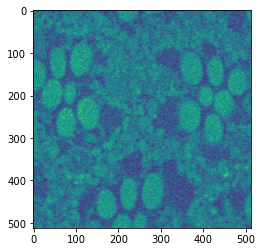

In [20]:
imshow(slices[100])

In [59]:
b = slices[100].copy()

In [60]:
b = mh.gaussian_filter(b, sigma=3)

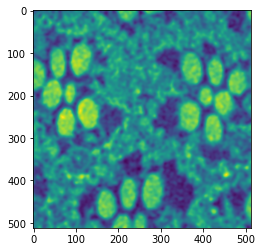

In [61]:
imshow(b)

In [62]:
b[b<130] = 0

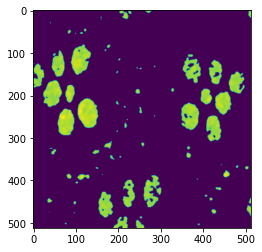

In [63]:
imshow(b)

In [64]:
labeled, number  = mh.label(b)

In [65]:
sizes = mh.labeled.labeled_size(labeled)

In [66]:
sizes

array([232957,    230,     75,     83,     42,      6,      2,      4,
           28,     46,     24,      4,   2184,     42,     12,   1263,
           28,     63,   1492,     16,   1151,      9,    952,      8,
            7,     12,     15,   1289,      5,   1951,    676,     43,
           90,    742,   1521,   2537,     32,   1996,     13,     61,
         1921,      5,   1595,      5,     52,      9,    164,     46,
           39,     10,     84,    101,     99,     54,     13,      3,
           25,     46,     19,    168,     92,    240,      3,   1672,
            4,   1110,     20,     70,      1,   1462,     21,     36,
           44,     78,     34,    159,     86,      1,      4,    553,
           20,    242,     10,     13], dtype=uint32)

In [73]:
too_small = np.where(sizes < 300)
labeled_only_big = mh.labeled.remove_regions(labeled, too_small)

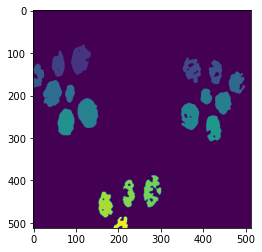

In [74]:
imshow(labeled_only_big)

In [75]:
binary_mask = labeled_only_big.copy()
binary_mask[binary_mask > 0] = 1

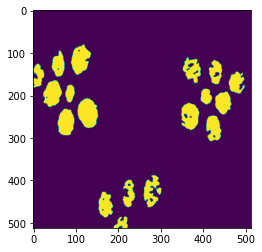

In [76]:
imshow(binary_mask)

In [77]:
binary_mask_closed_holes = mh.morph.close_holes(binary_mask)

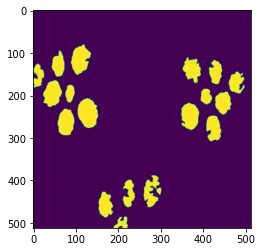

In [78]:
imshow(binary_mask_closed_holes)

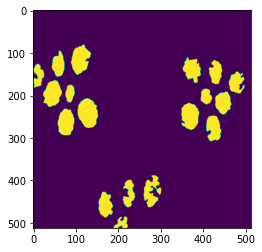

In [82]:
binary_mask_closed = mh.morph.close(binary_mask_closed_holes)
imshow(binary_mask_closed)

In [83]:
for i in range(4):
    binary_mask_closed = mh.morph.dilate(binary_mask_closed)
for i in range(4):
    binary_mask_closed = mh.morph.erode(binary_mask_closed)

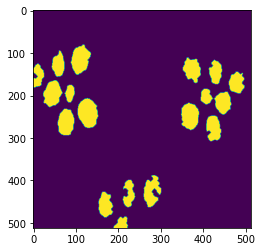

In [84]:
imshow(binary_mask_closed)

In [85]:
binary_mask_closed_filtered = mh.gaussian_filter(binary_mask_closed, sigma=3)

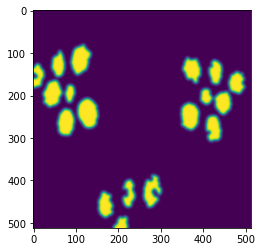

In [86]:
imshow(binary_mask_closed_filtered)

In [87]:
labeled_mask, number_1  = mh.label(binary_mask_closed)

In [90]:
final_binary_mask = labeled_mask.copy()
final_binary_mask[final_binary_mask > 0] = 1

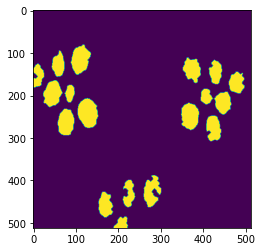

In [91]:
imshow(final_binary_mask)

In [92]:
number_1

18

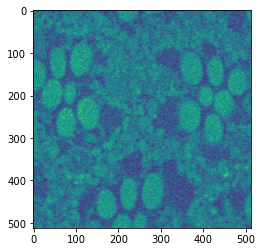

In [93]:
imshow(slices[100])

In [94]:
# plotting, binary masking and classifying as good and bad images
    
i = 0
j = 0
address_index = 0
for s in slices:
    # apply gaussian filter
    b = s.copy()
    b = mh.gaussian_filter(b, sigma=3)
    
    # filter by value
    b[b<130] = 0 # Could be played around with later
    
    # label regions
    labeled, number  = mh.label(b)
    #print("before size red {}".format(number))
    
    # filter based on labeled region size
    sizes = mh.labeled.labeled_size(labeled)
    too_small = np.where(sizes < 300)
    labeled_only_big = mh.labeled.remove_regions(labeled, too_small)
    # print(" after red {}".format(labeled_only_big))
    # create binary mask - foreground and background
    binary_mask = labeled_only_big.copy()
    binary_mask[binary_mask > 0] = 1
    # print("After removing small islands {}".format(number_1))
   
    # close holes in binary mask
    binary_mask_closed_holes = mh.morph.close_holes(binary_mask)
    
    # close region in binary mask
    binary_mask_closed = mh.morph.close(binary_mask_closed_holes)
    
    # dilate and erode to fill further holes
    for i in range(4):
        binary_mask_closed = mh.morph.dilate(binary_mask_closed)
    for i in range(4):
        binary_mask_closed = mh.morph.erode(binary_mask_closed)
    
    # apply gaussian filter on close region binary mask
    binary_mask_closed_filtered = mh.gaussian_filter(binary_mask_closed, sigma=3)
    
    # label regions
    labeled_mask, number_1  = mh.label(binary_mask_closed)
    
    # filter based on labeled region size
#     sizes = mh.labeled.labeled_size(labeled_mask)
#     too_small = np.where(sizes < 1000)
#     labeled_mask_only_big = mh.labeled.remove_regions(labeled_mask, too_small)
    
    # create binary mask - foreground and background
    final_binary_mask = labeled_mask.copy()
    final_binary_mask[final_binary_mask > 0] = 1
    
    
    if number_1 <=20 and number_1 >=15:
        #print(number_1)
        print(slice_address[address_index])
        mh.imsave(os.path.join(good, f"{slice_address[address_index].split('.')[0]}.tif"), final_binary_mask)
        j += 1
        #shutil.copy((DATA_DIR + '/' + slice_address[address_index]), (good + '/' + slice_address[address_index]))
    else:
        #print(number_1)
        #shutil.copy((DATA_DIR + '/' + slice_address[address_index]), (bad + '/' + slice_address[address_index]))

        i += 1
    
    
    address_index+=1

000000_000000_000225_000000.tif
000000_000000_000231_000000.tif
000000_000000_000257_000000.tif
000000_000000_000261_000000.tif
000000_000000_000265_000000.tif
000000_000000_000266_000000.tif
000000_000000_000267_000000.tif
000000_000000_000289_000000.tif
000000_000000_000293_000000.tif
000000_000000_000298_000000.tif
000000_000000_000303_000000.tif
000000_000000_000305_000000.tif
000000_000000_000307_000000.tif
000000_000000_000308_000000.tif
000000_000000_000313_000000.tif
000000_000000_000314_000000.tif
000000_000000_000329_000000.tif
000000_000000_000335_000000.tif
000000_000000_000338_000000.tif
000000_000000_000342_000000.tif
000000_000000_000344_000000.tif
000000_000000_000350_000000.tif
000000_000000_000359_000000.tif
000000_000000_000361_000000.tif
000000_000000_000362_000000.tif
000000_000000_000363_000000.tif
000000_000000_000367_000000.tif
000000_000000_000368_000000.tif
000000_000000_000376_000000.tif
000000_000000_000379_000000.tif
000000_000000_000386_000000.tif
000000_0

In [11]:
# count = 0
# for path in os.scandir(bad):
#     if path.is_file():
#         count += 1
# print('file count:', count)
# subplot_value = int(count) 

In [12]:
# plt.figure()
# f, axarr = plt.subplots((subplot_value), 2, figsize=(20, 40))

# i = 0
# address_index = 0
# for s in slices:
#     if number_1 <=25 and number_1 >=50:
#         axarr[i,0].set_title("{}  {}".format(number_1, slice_address[address_index]))
#         axarr[i,0].imshow(s)
#         axarr[i,1].set_title("{}  {}".format(number_1, slice_address[address_index]))
#         axarr[i,1].imshow(binary_mask_closed_filtered, 'jet', interpolation='none', alpha=0.7)
#         i += 1
        
#     address_index+=1
        